In [5]:
import pandahouse
import scipy.stats as sps
import pandas as pd

In [2]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator'
}

q = '''SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
    FROM simulator_20220620.feed_actions 
    WHERE toDate(time) between '2022-05-17' and '2022-05-23'
    and exp_group in (2,3)
    GROUP BY exp_group, user_id
    '''

df = pandahouse.read_clickhouse(q, connection=connection)

In [28]:
list = []
for i in range(10000):
  df1 = df[df.exp_group == 2].sample(500, replace=True)
  df2 = df[df.exp_group == 3].sample(500, replace=True)
  ttest = sps.ttest_ind(df1.ctr,df2.ctr, equal_var=False)
  list.append(ttest[1])

In [29]:
pvalues = pd.DataFrame({'pvalue':list})

array([[<AxesSubplot:title={'center':'pvalue'}>]], dtype=object)

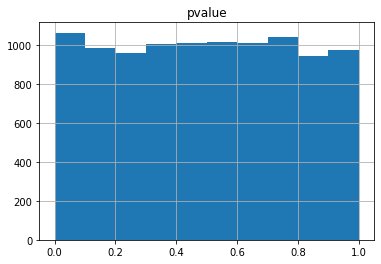

In [30]:
pvalues.hist()

In [31]:
pvalues.describe()

,pvalue
count,10000.000000
mean,0.496810
std,0.289353
min,0.000084
25%,0.245112
50%,0.498032
75%,0.744466
max,0.999832


In [32]:
pvalues.query('pvalue<=0.05').size / pvalues.size * 100

5.319999999999999

Вывод:
В связи с тем, что 5.32% значений p value оказались меньше либо равными 0.05, у нас недостаточно оснований принять гипотезу о равенстве двух групп. Мы можем предположить, что наша система сплитования работает не совсем корректно.
При этом есть вероятность, что тесту не хватило времени собрать достаточно данных для правильных выводов, так как он продолжался только одну неделю.